# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Group Operations

### Exercise 13: GroupBy

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the cars dataset (cars.csv).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("cars.csv")

__Calculate__ the mean/average mpg __by origin__ (mean mpg for usa, for europe and for japan)! Who built the __least__ fuel efficient cars?

In [3]:
cars.groupby("origin").mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

__Calculate__ the mean/average mpg __by model_year__ (mean mpg for the years 70, 71, ...). Can you see a __trend__? __Visualize__!

In [4]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [5]:
mpg_mean_by_year = cars.groupby("model_year").mpg.mean().round(2)
mpg_mean_by_year

model_year
70    17.69
71    21.25
72    18.71
73    17.10
74    22.70
75    20.27
76    21.57
77    23.38
78    24.06
79    25.09
80    33.70
81    30.33
82    31.71
Name: mpg, dtype: float64

In [6]:
plt.rcdefaults()

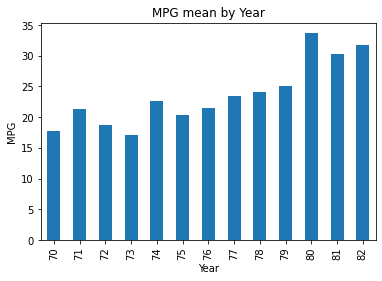

In [7]:
mpg_mean_by_year.plot(kind="bar")
plt.title("MPG mean by Year")
plt.ylabel("MPG")
plt.xlabel("Year")
plt.show()

__Calculate__ the mean/average mpg for each __combination of model_year & origin__ and __visualize__ how the mean mpg evolved over time for usa, europe and japan. <br>
Can you see the __same trend__ for all three orgins?

In [8]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [9]:
mpg_mean_by_year_origin = cars.groupby(["model_year", "origin"]).mpg.mean()
mpg_mean_by_year_origin.head(6)

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
            usa       18.100000
Name: mpg, dtype: float64

In [10]:
mpg_mean_by_year_origin.unstack().round(2)

origin,europe,japan,usa
model_year,,,
70,25.20,25.50,15.27
71,28.75,29.50,18.10
72,22.00,24.20,16.28
73,24.00,20.00,15.03
74,27.00,29.33,18.33
75,24.50,27.50,17.55
76,24.25,28.00,19.43
77,29.25,27.42,20.72
78,24.95,29.69,21.77


<AxesSubplot: xlabel='model_year'>

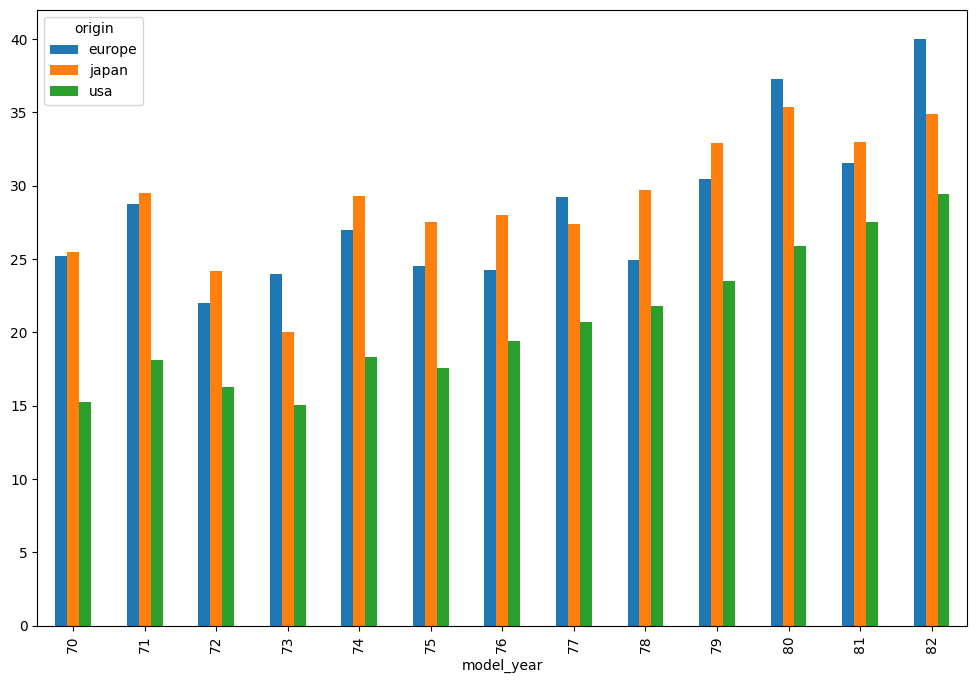

In [27]:
mpg_mean_by_year_origin.unstack().plot(kind= "bar", figsize= (12, 8))

array([<AxesSubplot: title={'center': 'europe'}, xlabel='model_year'>,
       <AxesSubplot: title={'center': 'japan'}, xlabel='model_year'>,
       <AxesSubplot: title={'center': 'usa'}, xlabel='model_year'>],
      dtype=object)

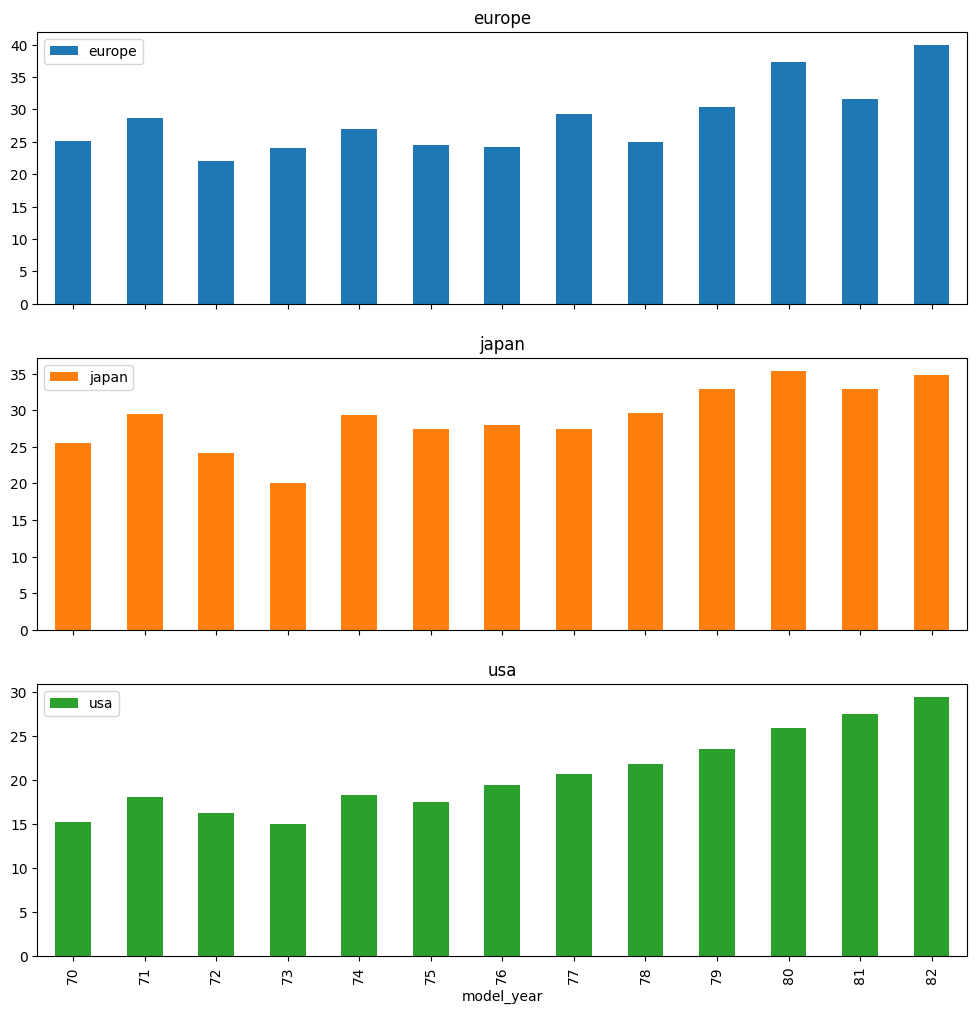

In [32]:
mpg_mean_by_year_origin.unstack().plot(kind= "bar", 
                                       figsize= (12, 12), 
                                       subplots= True, 
                                       sharex= True)

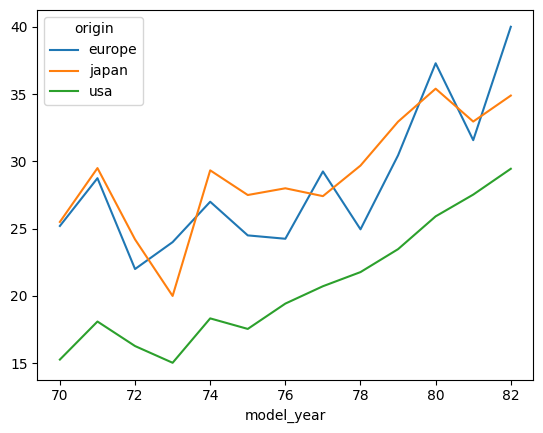

In [40]:
mpg_mean_by_year_origin.unstack().plot(kind= "line")

plt.show()

Calculate the __mean__, __min__ and __max__ mpg for each combination of model_year & origin!

In [11]:
df1 = cars.groupby(["model_year", "origin"]).mpg.agg(["mean", "min", "max"]).round(2)
df1.head(5)

mean   min   max
model_year origin                   
70         europe  25.20  24.0  26.0
           japan   25.50  24.0  27.0
           usa     15.27   9.0  22.0
71         europe  28.75  27.0  30.0
           japan   29.50  25.0  35.0

In [53]:
df1.index[0:4]

MultiIndex([(70, 'europe'),
            (70,  'japan'),
            (70,    'usa'),
            (71, 'europe')],
           names=['model_year', 'origin'])

Return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__! <br>(hint: a __user defined function__ might help!)

In [62]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [67]:
cars.loc[(cars.origin == "europe") & (cars.mpg == 26)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,vw 1131 deluxe sedan
23,26.0,4,121.0,113.0,2234,12.5,70,europe,bmw 2002
79,26.0,4,96.0,69.0,2189,18.0,72,europe,renault 12 (sw)
102,26.0,4,97.0,46.0,1950,21.0,73,europe,vw super beetle
114,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe
142,26.0,4,79.0,67.0,1963,15.5,74,europe,vw dasher
143,26.0,4,97.0,78.0,2300,14.5,74,europe,opel manta
148,26.0,4,116.0,75.0,2246,14.0,74,europe,fiat 124 tc


In [75]:
x = cars.groupby(["model_year", "origin"]).mpg.nlargest(2)
x

model_year  origin     
70          europe  19     26.0
                    23     26.0
            japan   18     27.0
                    14     24.0
            usa     15     22.0
                           ... 
82          europe  375    36.0
            japan   383    38.0
                    385    38.0
            usa     378    38.0
                    387    38.0
Name: mpg, Length: 78, dtype: float64

In [83]:
largest2_mpg_index = []
for i in range(len(x.index)):
    largest2_mpg_index.append(x.index[i][2])

In [92]:
cars.loc[largest2_mpg_index, ["name", "mpg"]]

,name,mpg
19,vw 1131 deluxe sedan,26.0
23,bmw 2002,26.0
18,datsun pl510,27.0
14,toyota corona mark ii,24.0
15,plymouth duster,22.0
...,...,...
375,vw rabbit l,36.0
383,honda civic,38.0
385,datsun 310 gx,38.0
378,plymouth horizon miser,38.0


In [93]:
def two_most_fuel_efficient_cars_by_origin_year(df):
    x = df.groupby(["model_year", "origin"]).mpg.nlargest(2)

    largest2_mpg_index = []

    for i in range(len(x.index)):
        largest2_mpg_index.append(x.index[i][2])
    
    return cars.loc[largest2_mpg_index, ["name", "mpg"]]



In [94]:
two_most_fuel_efficient_cars_by_origin_year(cars)

,name,mpg
19,vw 1131 deluxe sedan,26.0
23,bmw 2002,26.0
18,datsun pl510,27.0
14,toyota corona mark ii,24.0
15,plymouth duster,22.0
...,...,...
375,vw rabbit l,36.0
383,honda civic,38.0
385,datsun 310 gx,38.0
378,plymouth horizon miser,38.0


Rzutowanie na liste, powstaje lista która zawiera elementy para krotka-df, gdzie krotka jest opisem grupy a df slicem dla danej grupy. _indeksowanie_ wybiera DF, na której zastosowana jest funkcja

In [24]:
list(cars.groupby(["model_year", "origin"]))[0][1].nlargest(n= 2, columns= "mpg")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,vw 1131 deluxe sedan
23,26.0,4,121.0,113.0,2234,12.5,70,europe,bmw 2002


In [ ]:
def get_most_efficient(group):
    return group.nlargest(n =2, columns = "mpg").loc[:, ["name", "mpg"]]

In [26]:
most_eff = cars.groupby(["model_year", "origin"]).apply("mean")
most_eff

mpg  cylinders  displacement  horsepower  \
model_year origin                                                   
70         europe  25.200000   4.000000    107.800000   86.200000   
           japan   25.500000   4.000000    105.000000   91.500000   
           usa     15.272727   7.636364    336.909091  166.954545   
71         europe  28.750000   4.000000     95.000000   74.000000   
           japan   29.500000   4.000000     88.250000   79.250000   
           usa     18.100000   6.200000    257.000000  119.842105   
72         europe  22.000000   4.000000    111.000000   79.600000   
           japan   24.200000   3.800000     99.400000   93.800000   
           usa     16.277778   6.888889    281.250000  138.777778   
73         europe  24.000000   4.000000    105.000000   81.857143   
           japan   20.000000   4.250000    107.750000   98.500000   
           usa     15.034483   7.241379    314.103448  146.620690   
74         europe  27.000000   4.000000     93.166667   74.166667   
           japan   29.333333   4.000000     89.500000   72.500000   
           usa     18.333333   6.266667    236.066667  112.142857   
75         europe  24.500000   4.000000    109.500000   89.500000   
           japan   27.500000   4.000000    110.250000   80.250000   
           usa     17.550000   6.400000    253.400000  108.700000   
76         europe  24.250000   4.250000    116.125000   87.625000   
           japan   28.000000   4.500000    107.250000   76.500000   
           usa     19.431818   6.363636    243.954545  110.500000   
77         europe  29.250000   4.000000     98.500000   81.000000   
           japan   27.416667   4.166667    100.500000   81.166667   
           usa     20.722222   6.222222    242.333333  118.388889   
78         europe  24.950000   4.833333    126.166667   99.166667   
           japan   29.687500   4.000000    107.250000   79.250000   
           usa     21.772727   6.000000    217.545455  107.272727   
79         europe  30.450000   4.250000    126.000000   72.000000   
           japan   32.950000   4.000000     85.500000   65.000000   
           usa     23.478261   6.260870    231.260870  109.434783   
80         europe  37.288889   4.111111    104.222222   66.750000   
           japan   35.400000   4.076923    104.615385   78.846154   
           usa     25.914286   4.285714    151.571429   88.833333   
81         europe  31.575000   4.500000    122.750000   76.666667   
           japan   32.958333   4.333333    107.500000   78.333333   
           usa     27.530769   4.923077    164.846154   84.538462   
82         europe  40.000000   4.000000    101.000000   63.000000   
           japan   34.888889   4.000000    103.777778   74.000000   
           usa     29.450000   4.300000    142.950000   86.947368   

                        weight  acceleration  
model_year origin                             
70         europe  2309.200000     16.500000  
           japan   2251.000000     14.750000  
           usa     3716.500000     11.977273  
71         europe  2024.000000     16.750000  
           japan   1936.000000     16.375000  
           usa     3401.600000     14.575000  
72         europe  2573.200000     18.700000  
           japan   2300.400000     15.400000  
           usa     3682.666667     14.055556  
73         europe  2335.714286     16.428571  
           japan   2397.250000     15.625000  
           usa     3821.448276     13.620690  
74         europe  2139.333333     15.333333  
           japan   2053.000000     17.666667  
           usa     3503.333333     15.966667  
75         europe  2571.166667     15.083333  
           japan   2303.250000     16.000000  
           usa     3533.200000     16.350000  
76         europe  2611.000000     16.050000  
           japan   2217.500000     16.575000  
           usa     3405.409091     15.786364  
77         europe  2138.750000     15.000000  
           japan   2295.833333     16.316667  
           usa     3

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!).<br>
Then, __filter__ all cars, where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars are outliers/special cases in their respective group.

In [29]:
cars["mpg_mean_by_year_origin"]= cars.groupby(["model_year", "origin"]).mpg.transform("mean")

In [30]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_mean_by_year_origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.272727
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.272727
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.272727
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.272727
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.272727


In [33]:
cars[(abs(cars.mpg - cars.mpg_mean_by_year_origin) > 10)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_mean_by_year_origin
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.277778
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.722222
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.950000
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.772727
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.478261
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.478261
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.478261
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.478261
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.400000
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.400000


------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#run the cell
cars = pd.read_csv("cars.csv")

In [ ]:
#run the cell
cars.head()

In [ ]:
#run the cell
cars.tail()

In [ ]:
#run the cell
cars.info()

117. __Group__ cars by the column __origin__ and __calculate__ the __mean__/average __mpg__ for each origin (mean mpg for usa, for europe and for japan)! <br>
Who built the __least__ fuel efficient cars?

The least fuel efficient cars are from ... usa.

118. __Group__ cars by the column __model_year__ and __calculate__ the __mean__/average __mpg__ for each model_year (mean mpg for 70, 71, 72,...)! <br>__Save__ the result in the variable __mpg_by_year__ and __round__ to two decimals!

In [ ]:
# run the cell
mpg_by_year

__Inspect__! Can you see a __trend__?

In [ ]:
# run the cell!
mpg_by_year.plot()
plt.show()

The cars are getting ... more fuel efficient over time.

119. __Group__ cars by the columns __model_year and origin__ and return the __mean mpg__ for each group! <br> __Save__ the resulting DataFrame in the variable __mpg_year_origin__!
__Column labels__ of mpg_year_origin shall be __europe__, __japan__ & __usa__. __Fill in the gaps__! 

In [ ]:
mpg_year_origin = cars.groupby(---).mpg.mean().---.round(2)

In [ ]:
# run the cell
mpg_year_origin

__Inspect__! Do we have the __same trend__ for europe, japan and usa?

In [ ]:
# run the cell
mpg_year_origin.plot()
plt.show()

It seems that manufacturer from europe, japan and usa were able to improve efficiency!

120. __Group__ cars by __model_year and origin__ and return __mean__, __max__ and __min mpg__ for all groups! __Fill in the gaps!__

In [ ]:
cars.groupby(["model_year", "origin"]).mpg.---(---).unstack().round(2)

Next, return the columns __name__ and __mpg__ for the __two most fuel efficient cars__ for __each combination of model_year & origin__!

121. First, __create__ the __user defined function__ get_most_efficient! __Fill in the gaps!__ 

In [ ]:
def get_most_efficient(group):
    return group.---(n = ---, columns = "mpg").loc[:, ["name", "mpg"]]

122. __Apply__ get_most_efficient on the appropriate __groupby object__! __Save__ the resulting DataFrame in the variable __most_eff__. __Fill in the gaps!__

In [ ]:
most_eff = cars.groupby([---, ---]).---(---)

Tidy up and __Inspect__!

In [ ]:
# run the cell
most_eff = most_eff.droplevel(-1)

In [ ]:
# run the cell
most_eff.head(10)

123. __Select__ the 2 most efficient cars from __japan__ in __1980__! __Fill in the gaps!__ The __most efficient__ car is...?

In [ ]:
most_eff.loc[---]

The most efficient car is... the mazda glc.

Calculate the __mean mpg__ for each combination of __model_year & origin__ and __assign__ the corresponding __group-specific value__ to all cars (__new column__!). Then, __filter__ all cars where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars all outliers/special cases in their respective group.

124. First, __group__ cars by __model_year & origin__ and calculate the __mean mpg__ for each group via the --- method to create the new column __"group_mpg"__. <br>
__Fill in the gaps!__

In [ ]:
cars["group_mpg"] = cars.groupby(["model_year", "origin"]).mpg.---(---).round(2)

__Inspect!__ The group-specific mpg for the vw pickup is ... ?

In [ ]:
# run the cell
cars.head()

In [ ]:
# run the cell
cars.tail()

The group-specific mpg for the vw pickup is... 40.0!

125. __Create__ the column __"mpg_outlier"__ by __substracting__ the __group_mpg__ column from the __mpg__ column. __Round__ to 2 decimals! 

In [ ]:
# run the cell
cars.mpg_outlier.describe()

126. __Filter__ cars for all cars/rows, where the __absolute value__ in the __mpg_outlier__ column is __greater than 10__! __Fill in the gaps!__<br>
There is only one car, that is __significantly less fuel efficient__ than it´s peer group. Which one?

In [ ]:
cars.loc[--- > 10]

The... mazda rx-7 gs is significantly less fuel efficient than it´s peer group (negative value in mpg_outlier column).

# Well Done!

-------------------

# Hints (Spolier!)

117. cars.groupby("---").---.mean()

118. mpg_by_year = cars.groupby("---").---.---.round(2)

119. Don´t forget unstack() method!


120. agg() method, unstack() method

121. nlargest() method; 

122. group cars by model_year & origin; pass get_most_efficient to the apply() method

123. outer index level: 80; inner index level: "japan"

124. transform() method

125. (_pandas series_ - _pandas series_).round()

126. abs() method